## **Manipulasi Data**

In [17]:
import numpy as np
import pandas as pd
import random

# Set seed untuk reproduktibilitas
np.random.seed(42)
random.seed(42)

# Generate dataset baru
def generate_social_ads_dataset(num_samples=400):
    data = []

    for i in range(num_samples):
        # Generate User ID (3 digit)
        user_id = random.randint(100, 500)

        # Generate Gender
        gender = random.choice(['Male', 'Female'])

        # Generate Age (distribusi normal dengan mean 37 dan std 10)
        age = int(np.random.normal(37, 10))
        age = max(18, min(age, 50))

        # Generate Salary (distribusi normal dengan mean 70k dan std 30k)
        salary = int(np.random.normal(70000, 30000))
        salary = max(20000, min(salary, 100000))

        # Generate Purchased (berdasarkan probabilitas usia dan gaji)
        purchase_prob = 1 / (1 + np.exp(-(0.5 * (age - 40) + 0.0002 * (salary - 70000))))
        purchased = 1 if random.random() > purchase_prob else 0

        data.append([user_id, gender, age, salary, purchased])

    return pd.DataFrame(data, columns=['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'])

# Generate dataset baru
new_dataset = generate_social_ads_dataset()

# Simpan ke file CSV
new_dataset.to_csv('Manipulasi_Data_Social_Network_Ads_vigor.csv', index=False)

# Tampilkan preview
print("Preview Dataset Baru:")
print(new_dataset.head())
print(f"\nTotal Data: {len(new_dataset)}")
print("Distribusi Purchased:")
print(new_dataset['Purchased'].value_counts(normalize=True))

Preview Dataset Baru:
   User ID Gender  Age  EstimatedSalary  Purchased
0      427   Male   41            65852          0
1      240   Male   43           100000          0
2      477   Male   34            62975          1
3      379   Male   50            93023          0
4      116   Male   32            86276          0

Total Data: 400
Distribusi Purchased:
Purchased
1    0.6375
0    0.3625
Name: proportion, dtype: float64


In [18]:
from google.colab import files
files.download('Manipulasi_Data_Social_Network_Ads_vigor.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Klasifikasi K-NN**

In [19]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/My Drive/Latihan/Manipulasi_Data_Social_Network_Ads_vigor.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
x_latih, x_tes, y_latih, y_tes = train_test_split(x, y, test_size=0.25, random_state=0)

print (x_latih)

[[    46 100000]
 [    27  53011]
 [    50  54663]
 [    40  66095]
 [    18  39757]
 [    44  36128]
 [    48  45379]
 [    46  64452]
 [    49  52252]
 [    37  55670]
 [    39  32627]
 [    34 100000]
 [    41  80009]
 [    35  60966]
 [    38  40648]
 [    34  91526]
 [    37  92541]
 [    37  62962]
 [    42  79337]
 [    34  58755]
 [    34  91420]
 [    40  41803]
 [    31  52725]
 [    35  63370]
 [    27 100000]
 [    50  20000]
 [    22  48404]
 [    30  55386]
 [    31 100000]
 [    28  60358]
 [    28  53194]
 [    45  83775]
 [    26  84207]
 [    35  41333]
 [    50  28596]
 [    47 100000]
 [    50 100000]
 [    46  52692]
 [    34  36804]
 [    45  33374]
 [    43  88850]
 [    50  98778]
 [    32  64430]
 [    29  90387]
 [    20  71442]
 [    42  85413]
 [    38  74509]
 [    36 100000]
 [    34  20000]
 [    37  50451]
 [    31  53594]
 [    29  66557]
 [    22 100000]
 [    32 100000]
 [    25  20000]
 [    48  70306]
 [    37  65329]
 [    50 100000]
 [    19 10000

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_latih = sc.fit_transform(x_latih)
x_tes = sc.transform(x_tes)

In [27]:
# Training K-NN Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_latih, y_latih)

KNeighborsClassifier()

In [28]:
# Prediksi
y_prediksi = classifier.predict(x_tes)

In [29]:
# Making Confusion Matrix
from sklearn.metrics import confusion_matrix
hasil_cm = confusion_matrix(y_tes, y_prediksi)
print(hasil_cm)

[[27  5]
 [ 1 67]]


<ipython-input-30-fec4917d359c>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data==h, 0], x_data[y_data == h,1],


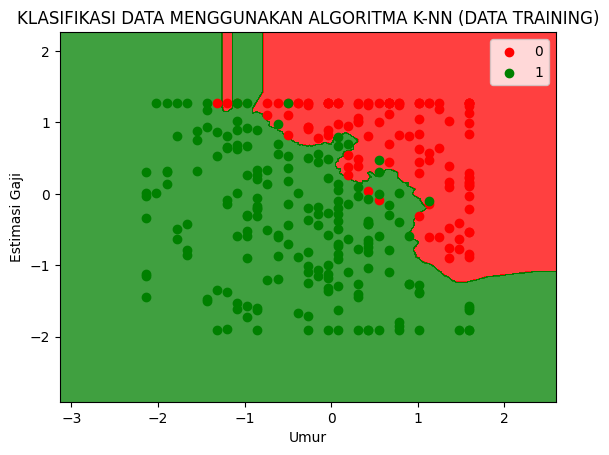

In [30]:
# Visualisasi Data Training
from matplotlib.colors import ListedColormap
x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(np.arange(start=x_data[:, 0].min()-1, stop=x_data[:, 0].max()+1, step=0.01),
                           np.arange(start=x_data[:, 1].min()-1, stop=x_data[:, 1].max()+1, step=0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_tes)):
  plt.scatter(x_data[y_data==h, 0], x_data[y_data == h,1],
              c = ListedColormap(('red', 'green'))(g), label=h)
plt.title('KLASIFIKASI DATA MENGGUNAKAN ALGORITMA K-NN (DATA TRAINING)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

<ipython-input-31-636838d8b51c>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data==h, 0], x_data[y_data == h,1],


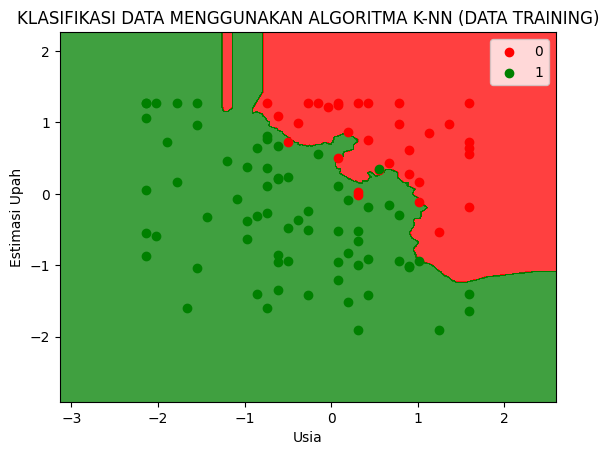

In [31]:
# Visualisasi Data Testing
from matplotlib.colors import ListedColormap
x_data, y_data = x_tes, y_tes
x_one, x_two = np.meshgrid(np.arange(start=x_data[:, 0].min()-1, stop=x_data[:, 0].max()+1, step=0.01),
                           np.arange(start=x_data[:, 1].min()-1, stop=x_data[:, 1].max()+1, step=0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_tes)):
  plt.scatter(x_data[y_data==h, 0], x_data[y_data == h,1],
              c = ListedColormap(('red', 'green'))(g), label=h)
plt.title('KLASIFIKASI DATA MENGGUNAKAN ALGORITMA K-NN (DATA TRAINING)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Upah')
plt.legend()
plt.show()